<a href="https://colab.research.google.com/github/rjanuzi/master_degree/blob/master/dataset/dataset_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading libs and dataset**

In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
dataset_idx = pd.read_csv(r'https://raw.githubusercontent.com/rjanuzi/master_degree/master/dataset/RAW_IMGS/dataset_index.csv', sep=';')

# **Data overview**

In [3]:
# Dataset size
dataset_idx.shape

(23906, 13)

In [4]:
# The 'id' and 'downloaded' cols are irrelevant to the analysis, so let's remove them
dataset_idx.drop(columns=['id', 'downloaded'], inplace=True, errors='ignore')
dataset_idx.head()

,name,img_type,pixels_x,pixels_y,age,sex,body_location,benign_malignant,diagnosis,diagnosis_confirm_type,melanocytic
0,ISIC_0000000,dermoscopic,1022,767,55.0,female,anterior torso,benign,nevus,NaN,True
1,ISIC_0000001,dermoscopic,1022,767,30.0,female,anterior torso,benign,nevus,NaN,True
2,ISIC_0000002,dermoscopic,1022,767,60.0,female,upper extremity,malignant,melanoma,histopathology,True
3,ISIC_0000003,dermoscopic,1022,767,30.0,male,upper extremity,benign,nevus,NaN,True
4,ISIC_0000004,dermoscopic,1022,767,80.0,male,posterior torso,malignant,melanoma,histopathology,True


**Numerical data columns description:**
*   pixels_x: The image width (in pixels).
*   pixels_y: The image height (in pixels).
*   age: The patient age when the lesion image was collected.



In [ ]:
# Summary of the numerical columns
dataset_idx.describe()

,pixels_x,pixels_y,age
count,23906.000000,23906.000000,23496.000000
mean,2120.987284,1444.231197,37.419348
std,1651.290711,1076.870694,23.269745
min,576.000000,450.000000,0.000000
25%,600.000000,450.000000,15.000000
50%,1936.000000,1450.000000,35.000000
75%,3024.000000,2016.000000,55.000000
max,6780.000000,6688.000000,85.000000


**Categorical data columns description:**
*   **name**: The image name in the original dataset.
*   **img_type**: The technique used to collect the image.
> *   **dermoscopic**: Collected with a dermatoscope.
> *   **clinical**: Collected used a regular camera.
*   **sex**: Patient sex.
*   **body_location**: The lesion location in the patient body.
*   **benign_malignant**: Indicate if the lesion was classified as benign or malignant.
> *   **benign**: Lesion that do not offers major health risks to the patient.
> *   **malignant**: Lesion that offers major health risks to the patient and shall be removed as soon as possible.
> *   **indeterminate/benign**: Probably a benign lesion, but have not been confirmed by laboratory exams.
> *   **indeterminate/malignant**: Probably a malignant lesion, but have not been confirmed by laboratory exams.
*   **diagnosis**: The diagnosis of the lesion type.
> *   **melanoma**: Most dangerous skin lesion
> *   **nevus**: Commom mole.
> *   The dataset have a series of others diagnosis, but at the moment the focus is at the melanoma classification.

*   **diagnosis_confirm_type**: The diagnosis method used.
> *   **histopathology**: Consists on cutting a thin slice of the lesion to realize the tissue analysis using a microscopic.
> *   **single image expert consensus**: Consists on a experts consensus based on a single image sample.
> *   **serial imaging showing no change**: Consists on compare the evolution of the lesion with a time spaced images sequence.
> *   **confocal microscopy with consensus dermoscopy**: Microscopic imaging technique.
> *   **nan**: Unknow Confirmation type.

*   **melanocytic**: If the lesion is or not melanocytic (boolean values). A lesion is melanocytic when it is located in melanocyte cells. 




In [5]:
dataset_idx.img_type.unique()

array(['dermoscopic', nan, 'clinical'], dtype=object)

In [ ]:
dataset_idx.body_location.unique()

array(['anterior torso', 'upper extremity', 'posterior torso',
       'lower extremity', nan, 'lateral torso', 'palms/soles',
       'head/neck'], dtype=object)

In [ ]:
dataset_idx.benign_malignant.unique()

array(['benign', 'malignant', 'indeterminate', nan,
       'indeterminate/benign', 'indeterminate/malignant'], dtype=object)

In [6]:
dataset_idx.diagnosis.unique()

array(['nevus', 'melanoma', nan, 'seborrheic keratosis',
       'lichenoid keratosis', 'dermatofibroma', 'angioma',
       'basal cell carcinoma', 'solar lentigo', 'lentigo NOS',
       'atypical melanocytic proliferation', 'lentigo simplex',
       'actinic keratosis', 'other', 'angiofibroma or fibrous papule',
       'squamous cell carcinoma', 'scar', 'pigmented benign keratosis',
       'vascular lesion'], dtype=object)

In [7]:
dataset_idx.diagnosis_confirm_type.unique()

array([nan, 'histopathology', 'single image expert consensus',
       'serial imaging showing no change',
       'confocal microscopy with consensus dermoscopy'], dtype=object)

In [ ]:
dataset_idx.melanocytic.unique()

array([True, nan, False], dtype=object)

# **Img Types Plots**

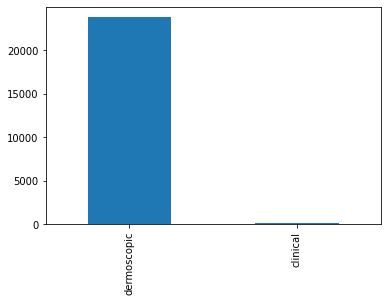

In [14]:
dataset_idx['img_type'].value_counts().plot.bar()

# **Image Sizes Plots**

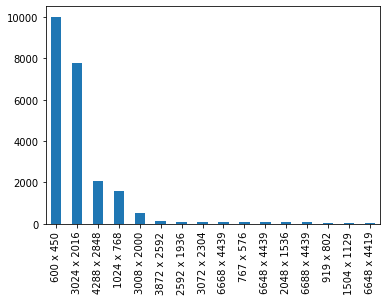

In [48]:
# Generate a new column concatening the pixels_x and piexels_y columns
dataset_idx['width_height'] = dataset_idx[['pixels_x', 'pixels_y']].apply(lambda row: ' x '.join(row.values.astype(str)), axis=1)
pix_size_count = dataset_idx['width_height'].value_counts()
pix_size_count[pix_size_count > 40].plot.bar()

# **Benign/Malignant Plots**

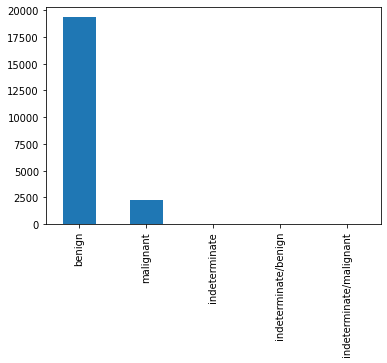

In [54]:
dataset_idx['benign_malignant'].value_counts().plot.bar()

# **Diagnosis Plots**

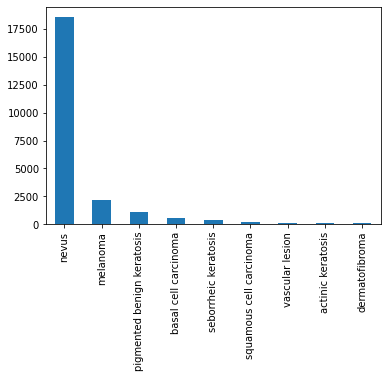

In [62]:
dataset_idx['diagnosis'].value_counts()[dataset_idx['diagnosis'].value_counts() > 100].plot.bar()

# **Confirmation Type Plots**

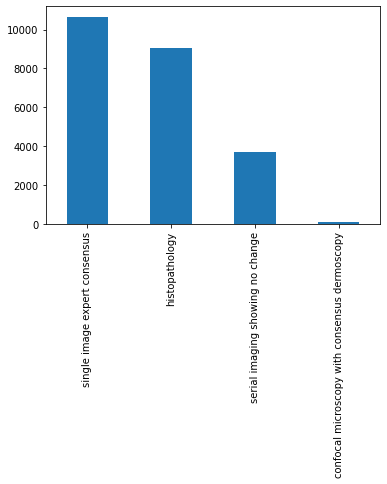

In [69]:
dataset_idx['diagnosis_confirm_type'].dropna().value_counts().plot.bar()